In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src import util
from src.linear_model import LinearModel

In [4]:
def main(tau, train_path, eval_path):
    """Problem 5(b): Locally weighted regression (LWR)

    Args:
        tau: Bandwidth parameter for LWR.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    
    return x_train, y_train, x_eval, y_eval




In [5]:
train_path = 'data/ds5_train.csv'
val_path = 'data/ds5_valid.csv'
test_path = 'data/ds5_test.csv'

x_train, y_train = util.load_dataset(train_path, add_intercept=True)
x_val, y_val = util.load_dataset(val_path, add_intercept=True)
x_test, y_test = util.load_dataset(test_path, add_intercept=True)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)


(300, 2) (300,)
(200, 2) (200,)
(200, 2) (200,)


In [130]:
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        
        self.x = x
        self.y = y
        
        # *** END CODE HERE ***
        

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        
        def w_matrix(train_data, query_pt):
            n = train_data.shape[0] # 300
            W = np.zeros((n,n))
            for i in range(n):
                xi = train_data[i] # shape:(2,)
                xi = np.expand_dims(xi,1) # shape:(2,1)
                #print(xi.shape)
                W[i][i]=np.exp(-np.sum(np.dot((xi-query_pt).T, xi-query_pt))/(2*self.tau**2))
            return W

        def calculate_theta(X,W,y):
            return np.dot(np.linalg.pinv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),y))
        


        
        y_preds = np.zeros((x.shape[0],))
        
        for i in range(x.shape[0]):
            query_pt = x[i]
            query_pt = np.expand_dims(query_pt,1)
            W = w_matrix(self.x, query_pt)
            theta = calculate_theta(self.x,W,self.y)
            y_pred = np.dot(theta.T,query_pt)
            y_preds[i] = y_pred
            

            
        return y_preds
            
        
        
        # *** END CODE HERE ***


In [167]:
tau = 0.5
clf = LocallyWeightedLinearRegression(tau)
clf.fit(x_train, y_train)

In [168]:
y_preds_train = clf.predict(x_train)
y_preds_val = clf.predict(x_val)
y_preds_test = clf.predict(x_test)


In [169]:
def MSE(y_pred, y_true):
    return (np.dot((y_pred-y_true).T,(y_pred-y_true)))/y_true.shape[0]

MSE_train = MSE(y_preds_train, y_train)
MSE_val = MSE(y_preds_val, y_val)
MSE_test = MSE(y_preds_test, y_test)



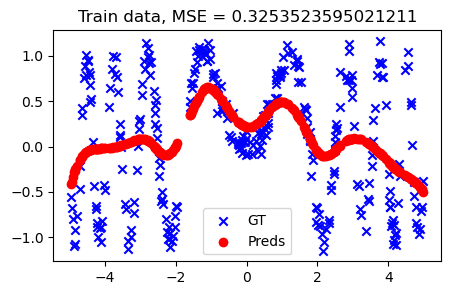

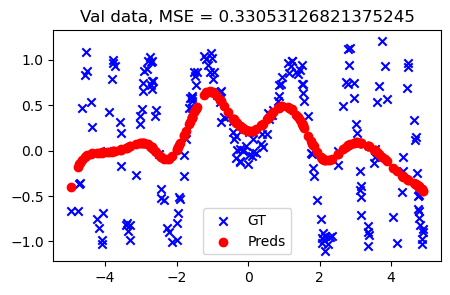

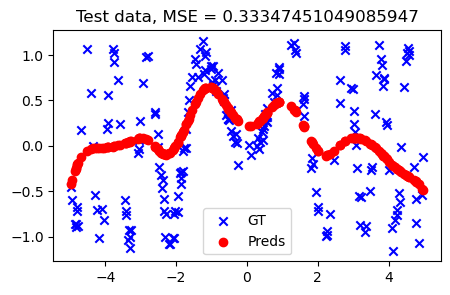

In [170]:
## TRAIN
plt.figure(figsize = (5,3))
plt.scatter(x_train[:,1], y_train, color = 'blue', marker = 'x', label = 'GT')
plt.scatter(x_train[:,1], y_preds_train, color = 'red', marker = 'o', label = 'Preds')
plt.title('Train data, MSE = {}'.format(MSE_train))
plt.legend()
## VAL ##
plt.figure(figsize = (5,3))
plt.scatter(x_val[:,1], y_val, color = 'blue', marker = 'x', label = 'GT')
plt.scatter(x_val[:,1], y_preds_val, color = 'red', marker = 'o', label = 'Preds')
plt.title('Val data, MSE = {}'.format(MSE_val))
plt.legend()
## TEST ##
plt.figure(figsize = (5,3))
plt.scatter(x_test[:,1], y_test, color = 'blue', marker = 'x', label = 'GT')
plt.scatter(x_test[:,1], y_preds_test, color = 'red', marker = 'o', label = 'Preds')
plt.title('Test data, MSE = {}'.format(MSE_test))
plt.legend()

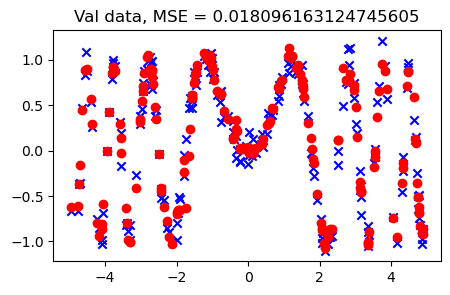

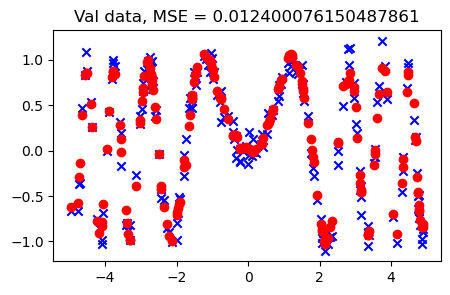

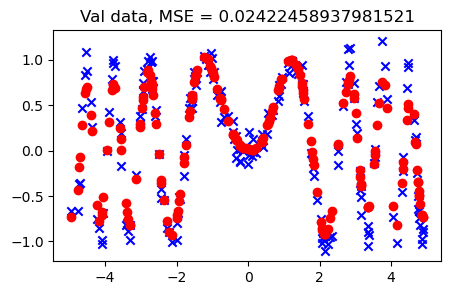

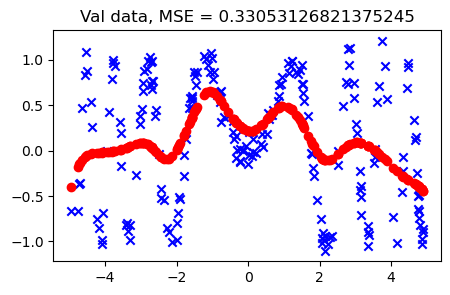

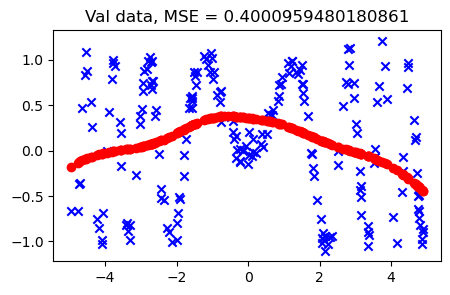

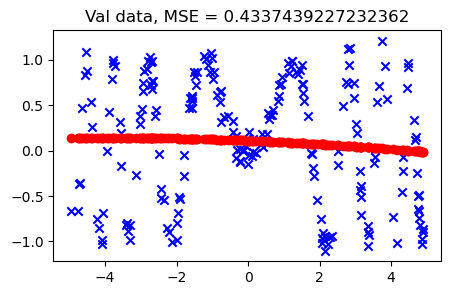

In [171]:
# Q 5b

taus = [3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]
MSEs = []
for tau in taus:
    clf = LocallyWeightedLinearRegression(tau)
    clf.fit(x_train, y_train)
    y_preds_val = clf.predict(x_val)
    
    MSE_val = MSE(y_preds_val, y_val)
    MSEs.append(MSE_val)

    plt.figure(figsize = (5,3))
    plt.scatter(x_val[:,1], y_val, color = 'blue', marker = 'x', label = 'GT')
    plt.scatter(x_val[:,1], y_preds_val, color = 'red', marker = 'o', label = 'Preds')
    plt.title('Val data, MSE = {}'.format(MSE_val))

0.05


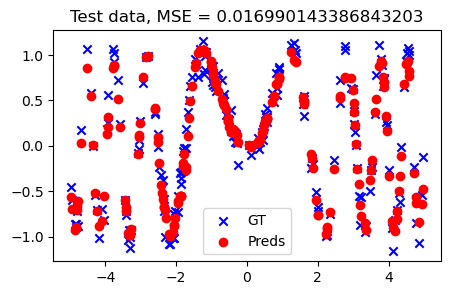

In [173]:
min_index = np.where(MSEs == min(MSEs))
best_tau  = taus[min_index[0][0]]
print(best_tau)

clf = LocallyWeightedLinearRegression(best_tau)
y_preds_train = clf.fit(x_train, y_train)
y_preds_test = clf.predict(x_test)

MSE_test = MSE(y_preds_test, y_test)

plt.figure(figsize = (5,3))
plt.scatter(x_test[:,1], y_test, color = 'blue', marker = 'x', label = 'GT')
plt.scatter(x_test[:,1], y_preds_test, color = 'red', marker = 'o', label = 'Preds')
plt.title('Test data, MSE = {}'.format(MSE_test))
plt.legend()

In [141]:
# Debugging

a = np.array([1,2])#; a = np.expand_dims(a,1); 
print(a.shape)
b = np.array([3,4])#; b =np.expand_dims(b,1); 
print(b.shape)

print('a*b = ',a*b)
#print('np.dot(a,b) = ',np.dot(a,b))
print('np.sum(a*b) = ',np.sum(a*b))
print('a.T*b = ',a.T*b)
print('np.dot(a.T,b) = ',np.dot(a.T,b))

print('a - b = ',a - b, (a-b).shape)
print('diff transpose = ', (a - b).T, ((a - b).T).shape )

print('L2 square = ',(a-b).T*(a-b))
print('L2 square = ',np.dot((a-b).T,(a-b)))

(2,)
(2,)
a*b =  [3 8]
np.sum(a*b) =  11
a.T*b =  [3 8]
np.dot(a.T,b) =  11
a - b =  [-2 -2] (2,)
diff transpose =  [-2 -2] (2,)
L2 square =  [4 4]
L2 square =  8


In [60]:
X = np.random.rand(300,2)
W = np.random.rand(300,300)
y = np.random.rand(300,1)
print(np.dot(np.dot(X.T,W),X))
print(np.dot(np.dot(X.T,W),X).shape)
print(np.dot(np.dot(X.T,W),X)[0])

print(np.linalg.pinv(np.dot(np.dot(X.T,W),X)))

print(np.dot(np.linalg.pinv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),y)))
print((np.dot(np.linalg.pinv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),y))).shape)

[[10646.9612294  10689.46397496]
 [10724.60802823 10776.17125881]]
(2, 2)
[10646.9612294  10689.46397496]
[[ 0.11566582 -0.11473515]
 [-0.11511236  0.11427894]]
[[ 1.75509453]
 [-0.69194057]]
(2, 1)
